In [464]:
%matplotlib inline

import numpy as np
from scipy import signal, ndimage, interpolate
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
font = {'family' : 'sans-serif',
        'size'   : 20}

plt.rc('font', **font)

from pathlib import Path
import os,sys
import h5py
import sys 

from circus.shared.parser import CircusParser
from circus.shared.files import load_data
import time

import nept
sys.path.append('../PreProcessing/')  
from pre_process_neuralynx import *
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing, Polygon
from collections import Counter
from descartes import PolygonPatch

In [2]:
# path to tracking data
datPath = '/Users/alexgonzalez/Google Drive/PostDoc/Code/TreeMazeAnalyses/Lib/Resources/VT1.nvt'

In [542]:
t,x,y = get_position(datPath)
x = signal.medfilt(x,5)
y = signal.medfilt(y,5)
b = signal.firwin(10, cutoff = 0.2, window = "hanning")
x = signal.filtfilt(b,1,x)
y = signal.filtfilt(b,1,y)
x2=(y-278)/269*1308
y2=(-x+530)/305*1358

rad=0.03
x3 = x2*np.cos(rad)+y2*np.sin(rad)
y3 = -x2*np.sin(rad)+y2*np.cos(rad)

(0, 350)

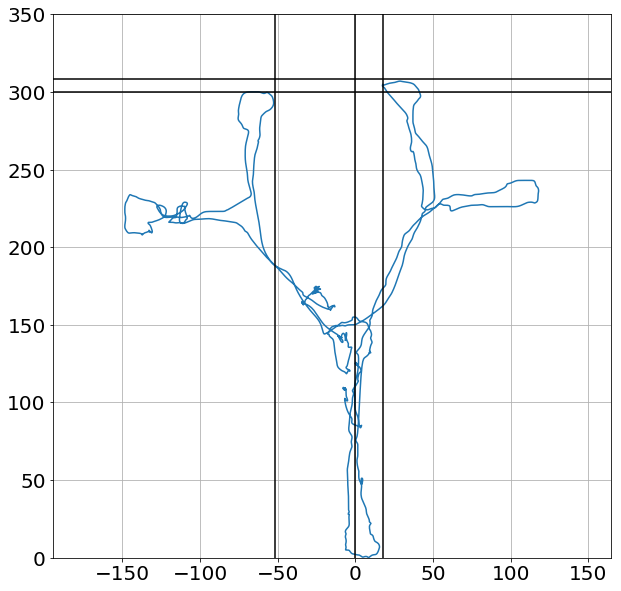

In [541]:
# plot and get a sense of the tilt
f,a1=plt.subplots(1,1, figsize=(10,10))
x2=y-275
y2=-x+530
a1.plot(x2,y2)
a1.axis('equal')
a1.axvline(0,color='k')
a1.axvline(18,color='k')
a1.axvline(-52,color='k')
a1.axhline(300,color='k')
a1.axhline(308,color='k')
a1.grid()
a1.set_ylim(0,350)

In [65]:
# compute the angle of the tilt
deg=np.arctan(8/70)/np.pi*180
rad = np.arctan(8/70)
z = np.sqrt(8**2+70**2)
print(z,deg,rad)
70/z

70.45565981523414 6.519801751656987 0.11379200714370806


0.9935326726564043

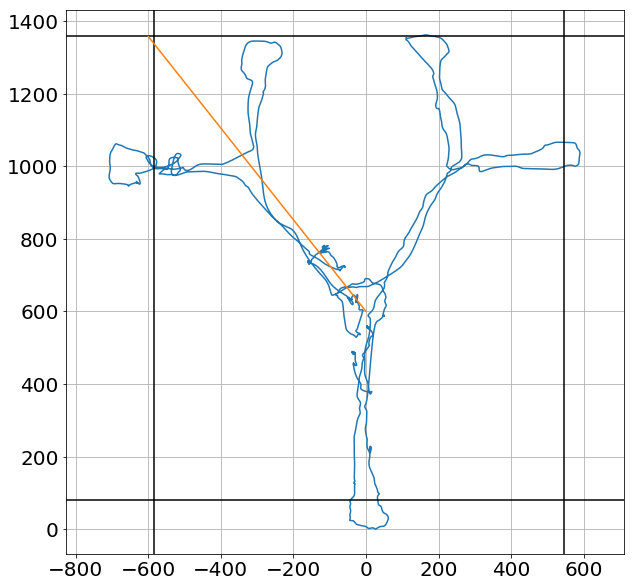

In [543]:
# plot and get a sense of the tilt
f,a1=plt.subplots(1,1, figsize=(10,10))
dims = [1358,1308]
x2=(y-278)/269*1308
y2=(-x+530)/305*1358

rad=0.03
x3 = x2*np.cos(rad)+y2*np.sin(rad)
y3 = -x2*np.sin(rad)+y2*np.cos(rad)
a1.plot(x3,y3)
a1.axis('equal')
#a1.axvline(0,color='k')
#a1.axvline(-40,color='k')

#a1.axhline(280,color='k')
a1.axhline(80,color='k')
a1.axhline(1358,color='k')
a1.axvline(-585,color='k')
a1.axvline(545,color='k')
a1.plot([0,-600],[600,1358])
a1.grid()
#a1.set_ylim(0,350)

In [468]:
def getPoly(coords):
    return Polygon(coords)
def plotPoly(poly,ax):    
    p1x,p1y = poly.exterior.xy
    ax.plot(p1x, p1y, color='k', alpha=0.3,
        linewidth=3,)
    ring_patch = PolygonPatch(poly, fc='r', ec='none', alpha=0.2)
    ax.add_patch(ring_patch)
    #ax.fill(p1x, p1x, alpha=1, fc='r', ec='none')

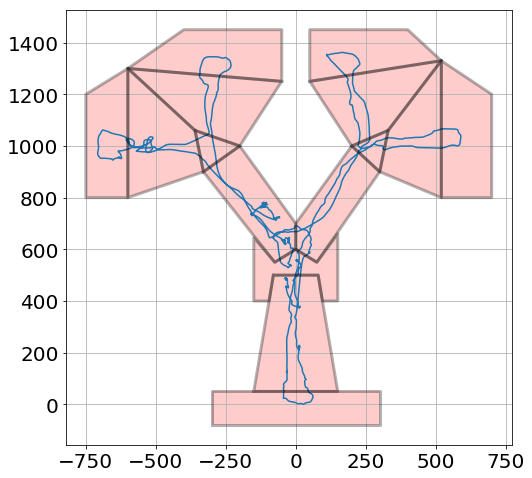

In [545]:
MazeZonesCoords ={'Home':[(-300, -80), (-300, 50),(300,50),(300, -80)],
                  'Center': [(-80,500),(-95,400),(-150,400),(-150,645),
                             (-75,550),(0,600),(75,550),(150,660),(150,400),(95,400),(80,500)],
                  'SegA': [(-150,50),(-80,500),(80,500),(150,50)],
                  'SegB': [(0,600),(0,700),(200,1000),(300,900),(75, 550)],
                  'SegC': [(330,1060),(520,1330),(520,800),(300,900)],
                  'SegD': [(200,1000),(50,1250),(520,1330),(330,1060)],
                  'SegE': [(0,600),(0,700),(-200,1000),(-330,900),(-75, 550)],
                  'SegF': [(-200,1000),(-50,1250),(-600,1300),(-360,1060)],
                  'SegG': [(-360,1060),(-600,1300),(-600,800),(-330,900)],
                  
                  'G1': [(520,1330),(700,1200),(700,800),(520,800)],
                  'G2': [(50,1250),(50,1450),(400,1450),(520,1330)],
                  'G3': [(-50,1250),(-50,1450),(-400,1450),(-600,1300)],
                  'G4': [(-600,1300),(-750,1200),(-750,800),(-600,800)],
                  
                  'I1': [(200,1000),(330,1060),(300,900)],
                  'I2': [(-330,900),(-360,1060),(-200,1000)],
                 }
# MazeZonesCoords ={'Home':[(-200, -60), (-200, 80),(200,80),(200, -60)],
#                   'Center': [(-100,500),(-200, 500), (-200, 600),(0,730),
#                (200, 600),(200,500),(100,500),(100,560),(-100,560)],
#                   'SegA': [(-100,80),(-100,560),(100,560),(100,80)],
#                   'SegB': [(0,730),(200,1000),(330,900),(200, 600)],
#                   'SegC': [(330,1060),(550,1200),(550,900),(330,900)],
#                   'SegD': [(200,1000),(100,1300),(400,1300),(330,1060)],
#                   'SegE': [(0,730),(-200,1000),(-330,900),(-200, 600)],
#                   'SegF': [(-200,1000),(-100,1300),(-400,1300),(-330,1060)],
#                   'SegG': [(-330,1060),(-600,1200),(-600,900),(-330,900)],
                  
#                   'G1': [(550,1200),(700,1200),(700,800),(550,800)],
#                   'G2': [(50,1300),(50,1450),(400,1450),(400,1300)],
#                   'G3': [(-50,1300),(-50,1450),(-400,1450),(-400,1300)],
#                   'G4': [(-600,1200),(-750,1200),(-750,800),(-600,800)],
                  
#                   'I1': [(200,1000),(330,1060),(400,1300),(550,1200),(330,1060),(330,900)],
#                   'I2': [(-330,900),(-330,1060),(-600,1200),(-400,1300),(-330,1060),(-200,1000)],
#                  }
MazeZonesGeom = {}
for zo in MazeZonesCoords.keys():
   MazeZonesGeom[zo] = getPoly(MazeZonesCoords[zo])

f,a1=plt.subplots(1,1, figsize=(8,8))
a1.plot(x3,y3)
a1.grid() 

for zo in MazeZonesGeom.keys():
    plotPoly(MazeZonesGeom[zo],a1)

In [525]:
ZoneOrd=['Home','SegA','Center','SegB','I1','SegC','G1','SegD','G2','SegE','I2','SegF','G3', 'SegG','G4']
PosZones = []
for xp, yp in zip(x3,y3):
    cnt=0
    for zo in ZoneOrd:
        if MazeZonesGeom[zo].contains(Point(xp,yp)):
            PosZones.append(cnt)
        cnt+=1

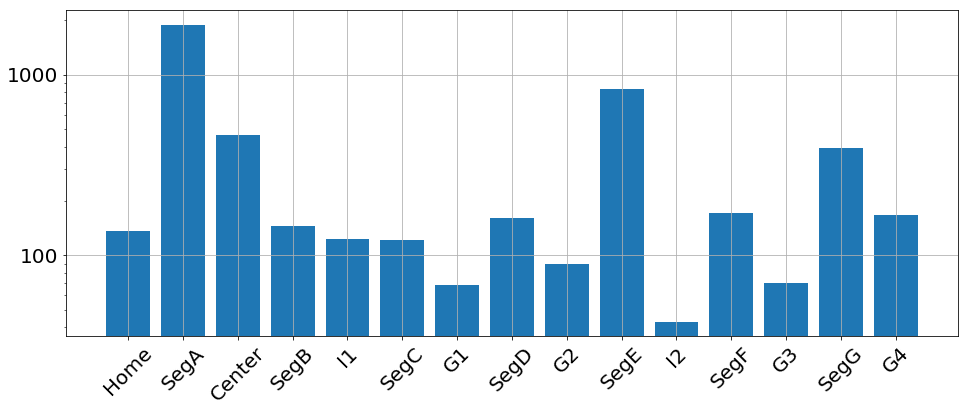

In [528]:
f,a1=plt.subplots(1,1, figsize=(16,6))
a=Counter(PosZones)
names = list(a.keys())
values = list(a.values())
a1.bar(names, values)
a1.set_yscale('log')
#a1.set_yticks([100,200, 500, 1000])
a1.set_xticks(np.arange(len(ZoneOrd)))
a1.set_xticklabels(ZoneOrd)
a1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
a1.grid()

for tick in a1.get_xticklabels():
    tick.set_rotation(45)


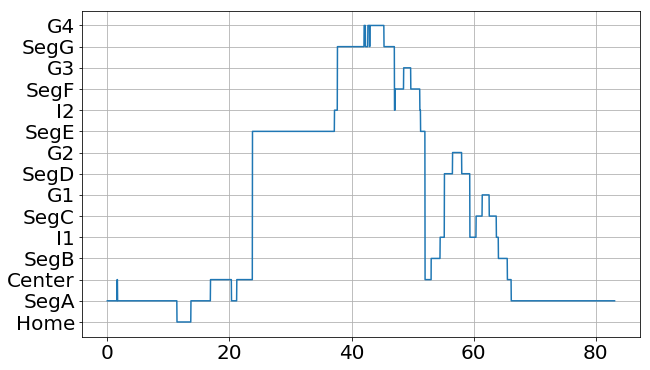

In [546]:
ZoneOrd=['Home','SegA','Center','SegB','I1','SegC','G1','SegD','G2','SegE','I2','SegF','G3', 'SegG','G4']

f,a1=plt.subplots(1,1, figsize=(10,6))
a1.plot(t-t[0],PosZones)
a1.set_yticks(np.arange(len(ZoneOrd)))
a1.set_yticklabels(ZoneOrd)
a1.grid()

In [505]:
unique(PosZones)
ZoneOrd=['Home','SegA','Center','SegB','I1','SegC','G1','SegD','G2','SegE','I2','SegF','G3', 'SegG','G4']


array(['Center', 'G1', 'G2', 'G3', 'G4', 'Home', 'I1', 'I2', 'SegA',
       'SegB', 'SegC', 'SegD', 'SegE', 'SegF', 'SegG'], dtype='<U6')

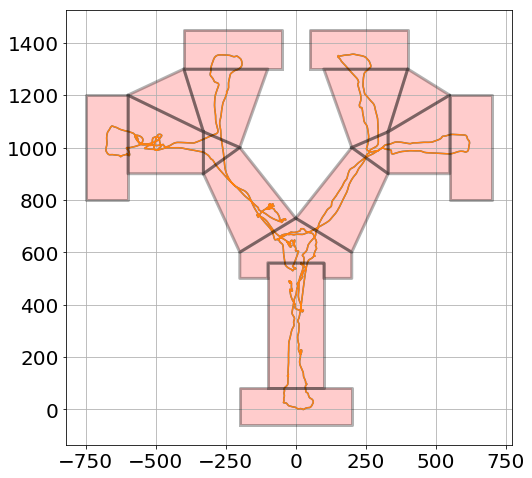

In [539]:
tp=np.arange(t[0],t[-1],0.02)
# y_cs = CubicSpline(t, y3)
# x_cs = CubicSpline(t, x3)
y_ip = interpolate.interp1d(t, y3, kind="nearest",fill_value="extrapolate")
x_ip = interpolate.interp1d(t, x3, kind="nearest",fill_value="extrapolate")
yp = y_ip(tp)
xp = x_ip(tp)

f,a1=plt.subplots(1,1, figsize=(8,8))
a1.plot(x3,y3)
a1.plot(xp,yp)

a1.grid() 

for zo in MazeZonesGeom.keys():
    plotPoly(MazeZonesGeom[zo],a1)

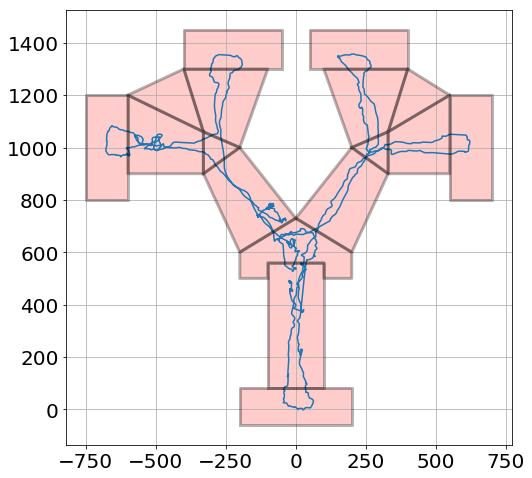

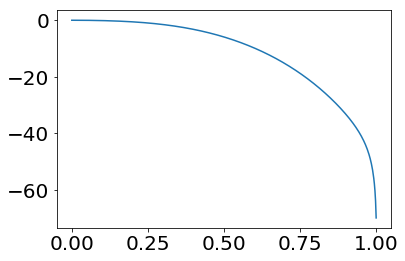

In [455]:
n = 10
b = signal.firwin(n, cutoff = 0.5, window = "blackman")
w,h = signal.freqz(b,1)
h_dB = 20 * log10 (abs(h))
plt.plot(w/max(w),h_dB)


array([-0.00529514, -0.00280325,  0.04350478,  0.16948784,  0.29510577,
        0.29510577,  0.16948784,  0.04350478, -0.00280325, -0.00529514])